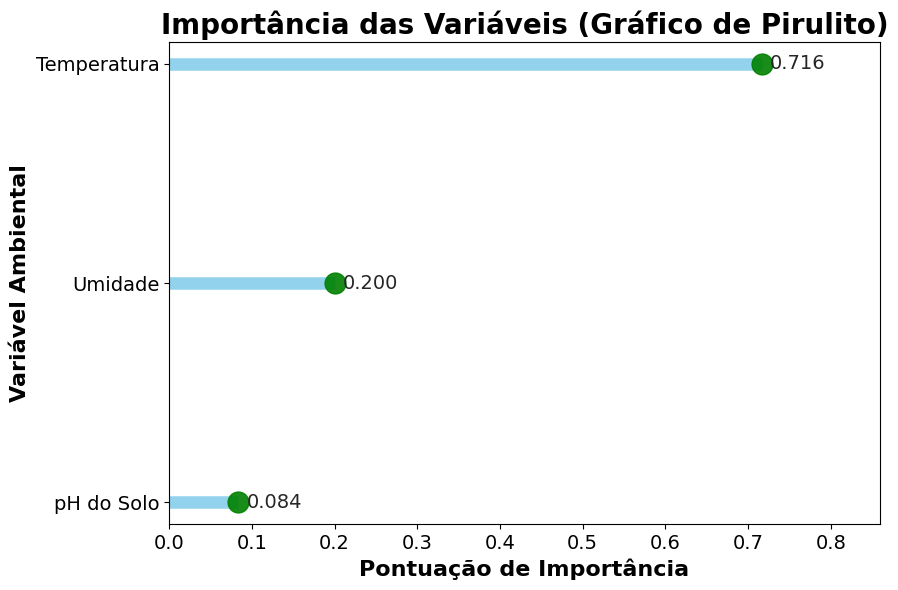

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Carregar o conjunto de dados e remover valores nulos
df = pd.read_csv('crop_yield_dataset2.csv').dropna()

# Definir variáveis independentes (X) e dependente (y)
X = df[['Temperature', 'Humidity', 'Soil_pH']]
y = df['Crop_Yield']

# Criar e treinar o modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X, y)

# Criar uma série com a importância das variáveis, ordenada de forma ascendente
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Traduzir os nomes das variáveis para o português
translation_dict = {
    'Temperature': 'Temperatura',
    'Humidity': 'Umidade',
    'Soil_pH': 'pH do Solo'
}
importances.index = importances.index.map(translation_dict)

# Criar o gráfico de pirulito (lollipop plot) em português
fig, ax = plt.subplots(figsize=(9, 6))
sns.set_style("whitegrid")

# Desenhar as linhas horizontais do gráfico de pirulito
ax.hlines(y=importances.index, xmin=0, xmax=importances.values,
          color='skyblue', alpha=0.9, linewidth=9)

# Adicionar os pontos no final das linhas
ax.plot(importances.values, importances.index, "o", markersize=15, color='green', alpha=0.9)

# Adicionar os valores de importância ao lado de cada ponto
for i, value in enumerate(importances):
    ax.text(value + 0.01, i, f'{value:.3f}', va='center', ha='left', fontsize=14)

# Personalizar o gráfico com títulos e rótulos em português
ax.set_title('Importância das Variáveis (Gráfico de Pirulito)', fontsize=20, fontweight='bold')
ax.set_xlabel('Pontuação de Importância', fontsize=16, fontweight='bold')
ax.set_ylabel('Variável Ambiental', fontsize=16, fontweight='bold')

# Ajustar o tamanho dos rótulos dos eixos
ax.tick_params(axis='both', which='major', labelsize=14)

# Ajustar o limite do eixo X para melhor visualização
ax.set_xlim(0, max(importances.values) * 1.2)

# Ajustar o layout para evitar cortes no gráfico
plt.tight_layout()

# Salvar o gráfico em alta resolução
plt.savefig('lollipop_plot_importancia_pt.png', dpi=300)

Análise de Dependência Parcial (PDP)

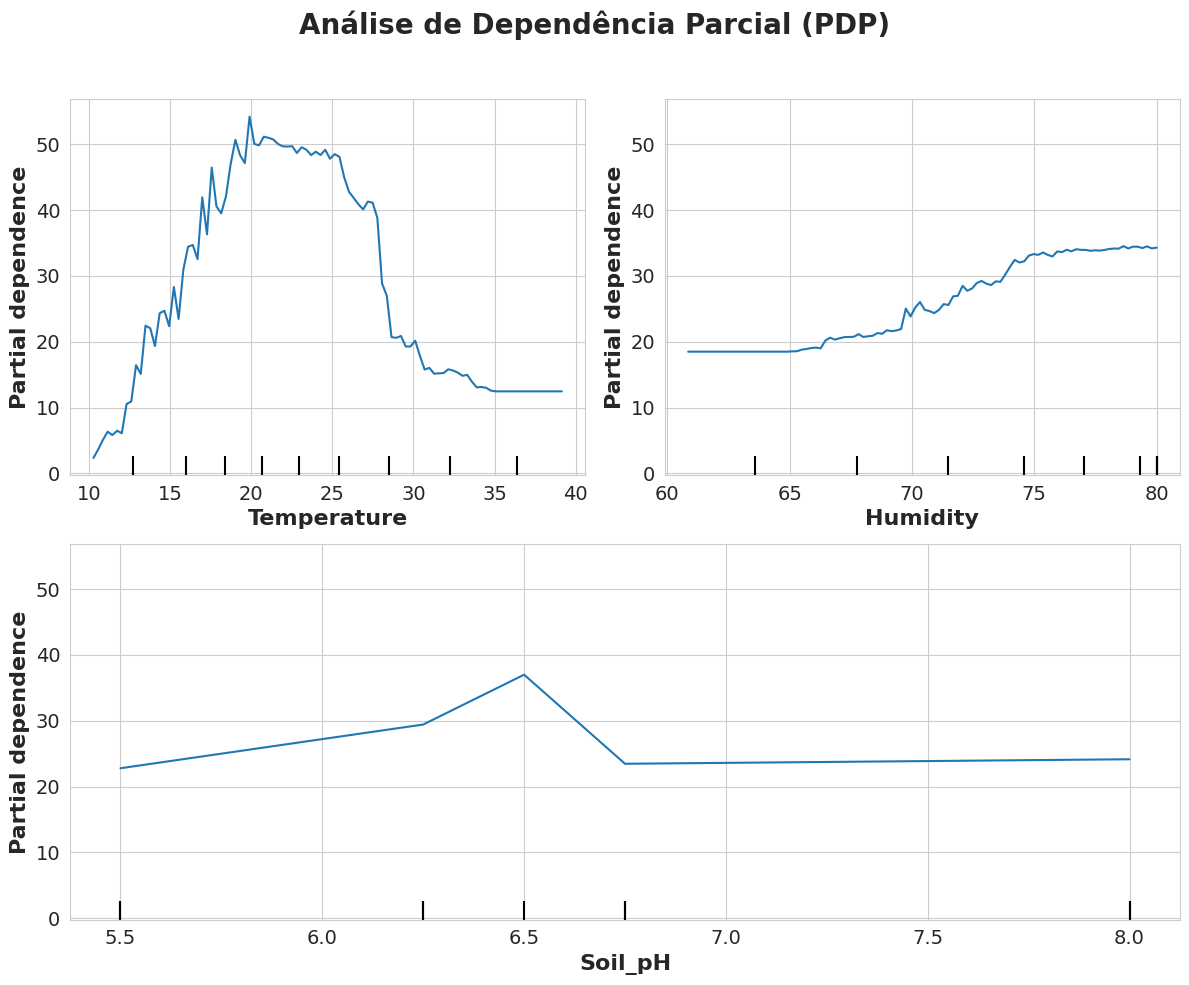

In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

# Carregar e preparar os dados, removendo valores nulos
df = pd.read_csv('crop_yield_dataset2.csv').dropna()
X = df[['Temperature', 'Humidity', 'Soil_pH']]
y = df['Crop_Yield']

# Criar e treinar o modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Criar figura com layout personalizado para os gráficos
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Análise de Dependência Parcial (PDP)', fontsize=20, fontweight='bold')

# Criar subplots manualmente para melhor controle do layout
# Linha superior: 2 gráficos
ax1 = plt.subplot(2, 2, 1)  # Linha 1, Coluna 1
ax2 = plt.subplot(2, 2, 2)  # Linha 1, Coluna 2
# Linha inferior: 1 gráfico centralizado (ocupa 2 colunas)
ax3 = plt.subplot(2, 1, 2)  # Linha 2, ocupando toda a linha

# Lista de eixos para facilitar a iteração
axes = [ax1, ax2, ax3]

# Gerar gráficos de dependência parcial para cada variável
display = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=['Temperature', 'Humidity', 'Soil_pH'],
    ax=axes
)

# Personalizar cada subplot
for i, axis in enumerate(axes):
    # Aumentar o tamanho dos números nos eixos
    axis.tick_params(axis='both', which='major', labelsize=14)

    # Aumentar o tamanho das etiquetas dos eixos
    axis.set_xlabel(axis.get_xlabel(), fontsize=16, fontweight='bold')
    axis.set_ylabel(axis.get_ylabel(), fontsize=16, fontweight='bold')

    # Aumentar o tamanho do título de cada subplot
    axis.set_title(axis.get_title(), fontsize=14, fontweight='bold')

# Ajustar o layout para evitar sobreposição com o supertítulo
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Salvar o gráfico em alta resolução
plt.savefig('confirmacion_pdp.png', dpi=300)

# Exibir o gráfico
plt.show()

Para visualizar a relação funcional entre o pH do Solo e o Rendimento, foi treinado um modelo GradientBoostingRegressor, selecionado por sua capacidade de capturar tendências não-lineares complexas nos dados.

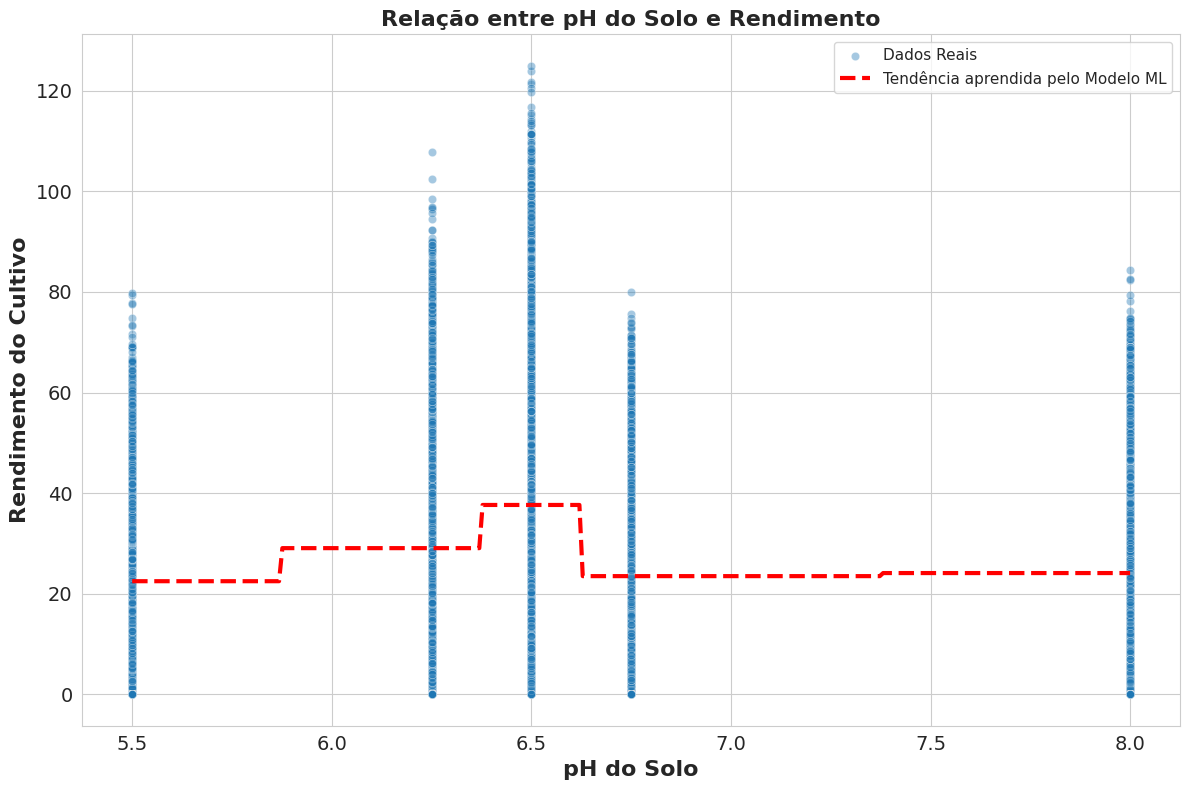

In [3]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Carregar e preparar os dados
try:
    df = pd.read_csv('crop_yield_dataset2.csv').dropna()
except FileNotFoundError:
    print("Arquivo não encontrado. Usando dados de exemplo.")
    # Gerar dados de exemplo com uma relação não linear
    np.random.seed(42)
    ph_values = np.linspace(5.0, 8.0, 200)
    # Rendimiento ótimo próximo ao pH 6.5
    optimal_yield = 1.2 * np.exp(-((ph_values - 6.5)**2) / (2 * 0.5**2))
    noise = np.random.normal(0, 0.1, 200)
    yield_values = (optimal_yield + noise) * 3000
    data = {'Soil_pH': 'pH do Solo', 'Crop_Yield': 'Rendimento do Cultivo'}
    df = pd.DataFrame(data)

# Treinamento do modelo e visualização

# 1. Definir a variável preditora (X) e a variável alvo (y)
# Usar .values.reshape(-1, 1) para preparar os dados para o scikit-learn
X = df[['Soil_pH']].values
y = df['Crop_Yield'].values

# 2. Treinar o modelo de Machine Learning
# GradientBoostingRegressor é adequado para capturar tendências não lineares
ml_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
ml_model.fit(X, y)

# 3. Criar um intervalo suave de valores de pH para a predição
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# 4. Usar o modelo treinado para prever o rendimento nesse intervalo
y_prediction = ml_model.predict(X_range)

# 5. Criar o gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Camada 1: Gráfico de dispersão dos dados reais
sns.scatterplot(x=df['Soil_pH'], y=df['Crop_Yield'], alpha=0.4, label='Dados Reais')

# Camada 2: Linha da predição do modelo de Machine Learning
plt.plot(X_range, y_prediction, color='red', linewidth=3, linestyle='--',
         label='Tendência aprendida pelo Modelo ML')

# 6. Personalizar o gráfico
plt.title('Relação entre pH do Solo e Rendimento', fontsize=16, fontweight='bold')
plt.xlabel('pH do Solo', fontsize=16, fontweight='bold')
plt.ylabel('Rendimento do Cultivo', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=14)

# Ajustar o layout para evitar cortes no gráfico
plt.tight_layout()

# Salvar o gráfico em alta resolução
plt.savefig('relacionph.png', dpi=300)

# Exibir o gráfico
plt.show()

Para visualizar a Relação entre Temperatura e Rendimento, foi treinado um modelo GradientBoostingRegressor.

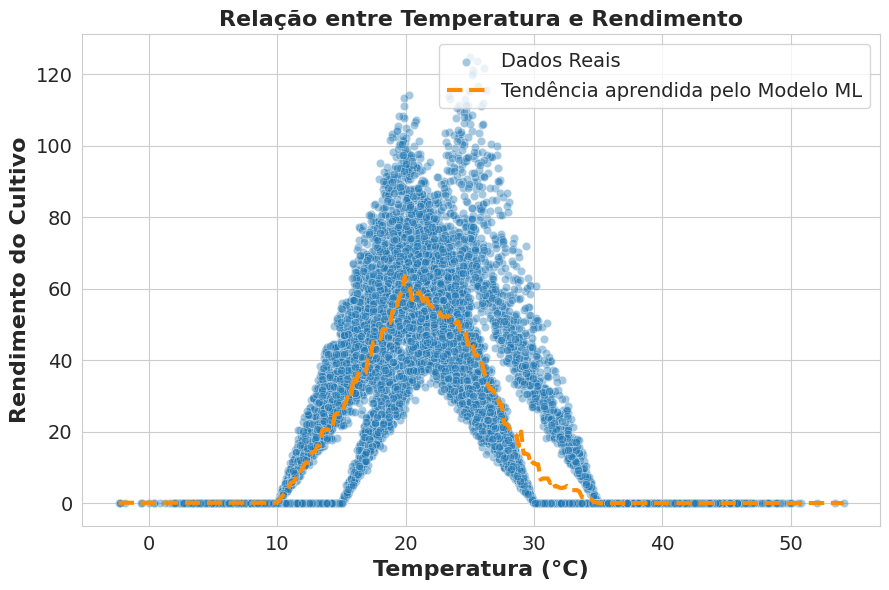

In [7]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Carregar e preparar os dados
try:
    df = pd.read_csv('crop_yield_dataset2.csv').dropna()
except FileNotFoundError:
    print("Arquivo não encontrado. Usando dados de exemplo.")
    # Gerar dados de exemplo com uma relação não linear para a temperatura
    np.random.seed(42)
    temp_values = np.linspace(15, 40, 200)
    # Rendimento ótimo próximo a 28°C
    optimal_yield = 1.2 * np.exp(-((temp_values - 28)**2) / (2 * 5**2))
    noise = np.random.normal(0, 0.1, 200)
    yield_values = (optimal_yield + noise) * 3500
    data = {'Temperature': temp_values, 'Crop_Yield': yield_values}
    df = pd.DataFrame(data)

# Treinamento do modelo e visualização

# 1. Definir a variável preditora (X) e a variável alvo (y)
# Usar .values para preparar os dados para o scikit-learn
X = df[['Temperature']].values
y = df['Crop_Yield'].values

# 2. Treinar o modelo de Machine Learning
# GradientBoostingRegressor é adequado para capturar tendências não lineares
ml_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
ml_model.fit(X, y)

# 3. Criar um intervalo suave de valores de temperatura para a predição
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# 4. Usar o modelo treinado para prever o rendimento nesse intervalo
y_prediction = ml_model.predict(X_range)

# 5. Criar o gráfico
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")

# Camada 1: Gráfico de dispersão dos dados reais
sns.scatterplot(x=df['Temperature'], y=df['Crop_Yield'], alpha=0.4, label='Dados Reais')

# Camada 2: Linha da predição do modelo de Machine Learning
plt.plot(X_range, y_prediction, color='darkorange', linewidth=3, linestyle='--',
         label='Tendência aprendida pelo Modelo ML')

# 6. Personalizar o gráfico
plt.title('Relação entre Temperatura e Rendimento', fontsize=16, fontweight='bold')
plt.xlabel('Temperatura (°C)', fontsize=16, fontweight='bold')
plt.ylabel('Rendimento do Cultivo', fontsize=16, fontweight='bold')
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

# Ajustar o layout para evitar cortes no gráfico
plt.tight_layout()

# Salvar o gráfico em alta resolução
plt.savefig('relacion_temperatura_rendimiento_ml.png', dpi=300)

# Exibir o gráfico
plt.show()

Para visualizar a Relação entre Umidade e Rendimento, foi treinado um modelo GradientBoostingRegressor.

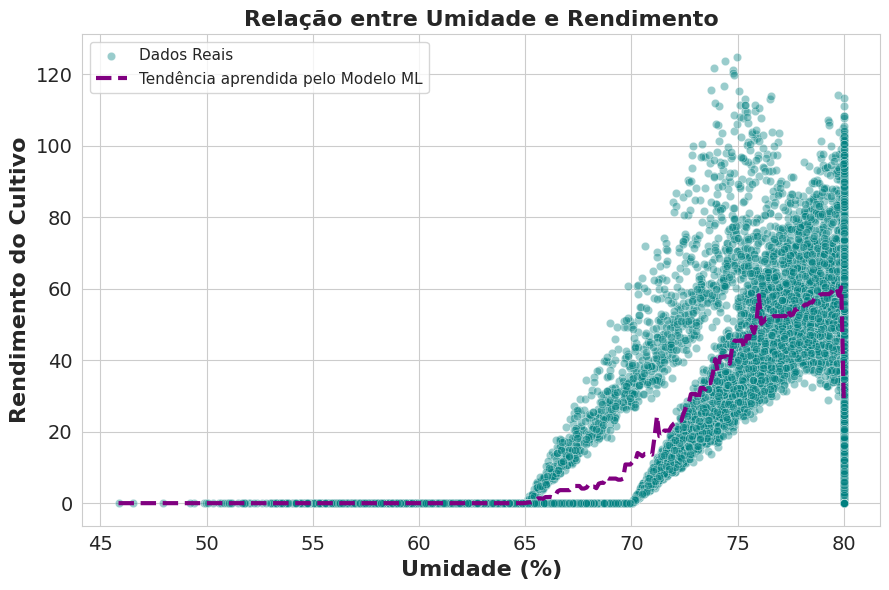

In [6]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Carregar e preparar os dados
try:
    df = pd.read_csv('crop_yield_dataset2.csv').dropna()
except FileNotFoundError:
    print("Arquivo não encontrado. Usando dados de exemplo.")
    # Gerar dados de exemplo com uma relação não linear para a umidade
    np.random.seed(42)
    humidity_values = np.linspace(40, 90, 200)
    # Rendimento ótimo próximo a uma umidade de 65-70%
    optimal_yield = 1.1 * np.exp(-((humidity_values - 68)**2) / (2 * 10**2))
    noise = np.random.normal(0, 0.1, 200)
    yield_values = (optimal_yield + noise) * 3200
    data = {'Humidity': humidity_values, 'Crop_Yield': yield_values}
    df = pd.DataFrame(data)

# Treinamento do modelo e visualização

# 1. Definir a variável preditora (X) e a variable alvo (y)
# Usar .values para preparar os dados para o scikit-learn
X = df[['Humidity']].values
y = df['Crop_Yield'].values

# 2. Treinar o modelo de Machine Learning
# GradientBoostingRegressor é adequado para capturar tendências não lineares
ml_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
ml_model.fit(X, y)

# 3. Criar um intervalo suave de valores de umidade para a predição
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# 4. Usar o modelo treinado para prever o rendimento nesse intervalo
y_prediction = ml_model.predict(X_range)

# 5. Criar o gráfico
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")

# Camada 1: Gráfico de dispersão dos dados reais
sns.scatterplot(x=df['Humidity'], y=df['Crop_Yield'], alpha=0.4, label='Dados Reais', color='teal')

# Camada 2: Linha da predição do modelo de Machine Learning
plt.plot(X_range, y_prediction, color='purple', linewidth=3, linestyle='--',
         label='Tendência aprendida pelo Modelo ML')

# 6. Personalizar o gráfico
plt.title('Relação entre Umidade e Rendimento', fontsize=16, fontweight='bold')
plt.xlabel('Umidade (%)', fontsize=16, fontweight='bold')
plt.ylabel('Rendimento do Cultivo', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=14)

# Ajustar o layout para evitar cortes no gráfico
plt.tight_layout()

# Salvar o gráfico em alta resolução
plt.savefig('relacion_humedad.png', dpi=300)

# Exibir o gráfico
plt.show()